In [5]:
import pandas as pd
import numpy as np
import sklearn.metrics
import sklearn.model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

In [6]:

# Read the Excel file into a dictionary of DataFrames
file_path = r'C:\Users\stlp\dow_dataset\PSE_Dataset.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None)

# Concatenate all sheets into a single DataFrame
all_sheets = list(excel_data.values())
combined_data = pd.concat(all_sheets, ignore_index=True)

train, test = sklearn.model_selection.train_test_split(combined_data, test_size=0.2, random_state=206)



In [7]:
# Tokenize the text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
train_text = train['Report'].values
test_text = test['Report'].values

train_label = train['Level'].values
test_label = test['Level'].values

train_x = vectorizer.fit_transform(train_text)
train_y = train_label

test_x = vectorizer.transform(test_text)
test_y = test_label



In [8]:
# Hyperparameter tuning for Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=206)
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search = sklearn.model_selection.GridSearchCV(rf_model, params, cv=5)
grid_search.fit(train_x, train_y)
best_rf_model = grid_search.best_estimator_



In [13]:
# Try different classification algorithms
svm_model = SVC()
nb_model = MultinomialNB()

svm_model.fit(train_x, train_y)
nb_model.fit(train_x, train_y)



MultinomialNB()

In [14]:
# Ensemble Methods - Voting Classifier
voting_model = VotingClassifier(
    estimators=[('rf', best_rf_model), ('svm', svm_model), ('nb', nb_model)],
    voting='hard'
)
voting_model.fit(train_x, train_y)



VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     random_state=206)),
                             ('svm', SVC()), ('nb', MultinomialNB())])

In [15]:
# Accuracy report for the models
print("Random Forest Model accuracy:", best_rf_model.score(test_x, test_y))
print("SVM Model accuracy:", svm_model.score(test_x, test_y))
print("Naive Bayes Model accuracy:", nb_model.score(test_x, test_y))
print("Voting Classifier accuracy:", voting_model.score(test_x, test_y))


Random Forest Model accuracy: 0.6333333333333333
SVM Model accuracy: 0.5666666666666667
Naive Bayes Model accuracy: 0.5666666666666667
Voting Classifier accuracy: 0.55


In [16]:
# Predictions
rf_predict_y = best_rf_model.predict(test_x)
svm_predict_y = svm_model.predict(test_x)
nb_predict_y = nb_model.predict(test_x)
voting_predict_y = voting_model.predict(test_x)


In [17]:
# Classification reports
print("Random Forest Classification Report:\n", sklearn.metrics.classification_report(test_y, rf_predict_y, digits=4))
print("SVM Classification Report:\n", sklearn.metrics.classification_report(test_y, svm_predict_y, digits=4))
print("Naive Bayes Classification Report:\n", sklearn.metrics.classification_report(test_y, nb_predict_y, digits=4))
print("Voting Classifier Classification Report:\n", sklearn.metrics.classification_report(test_y, voting_predict_y, digits=4))


Random Forest Classification Report:
               precision    recall  f1-score   support

           1     1.0000    0.8571    0.9231         7
           2     0.2857    0.4000    0.3333        10
           3     0.6000    0.4000    0.4800        15
           4     0.5333    0.5714    0.5517        14
           5     0.9333    1.0000    0.9655        14

    accuracy                         0.6333        60
   macro avg     0.6705    0.6457    0.6507        60
weighted avg     0.6565    0.6333    0.6373        60

SVM Classification Report:
               precision    recall  f1-score   support

           1     1.0000    0.8571    0.9231         7
           2     0.2857    0.6000    0.3871        10
           3     0.4286    0.2000    0.2727        15
           4     0.4545    0.3571    0.4000        14
           5     0.9333    1.0000    0.9655        14

    accuracy                         0.5667        60
   macro avg     0.6204    0.6029    0.5897        60
weighted av

<Axes: >

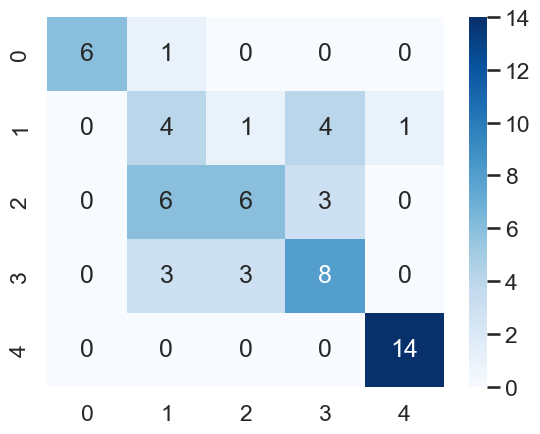

In [19]:
# Plotting the confusion matrix
cm = sklearn.metrics.confusion_matrix(test_y, rf_predict_y)
sns.heatmap(cm, annot=True, cmap='Blues')

<Axes: >

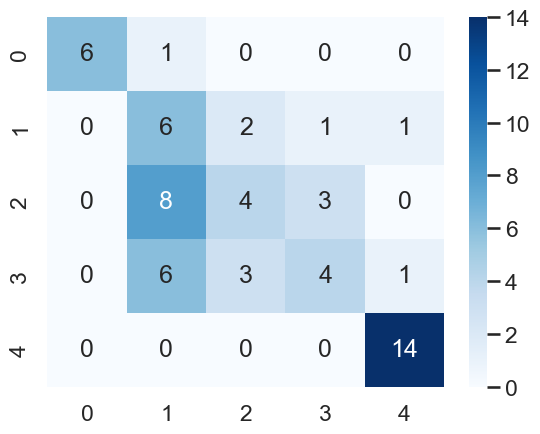

In [20]:
# Plotting the confusion matrix
cm = sklearn.metrics.confusion_matrix(test_y, nb_predict_y)
sns.heatmap(cm, annot=True, cmap='Blues')

<Axes: >

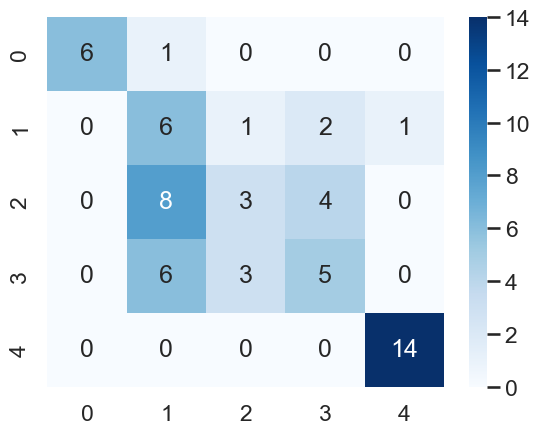

In [21]:
# Plotting the confusion matrix
cm = sklearn.metrics.confusion_matrix(test_y, svm_predict_y)
sns.heatmap(cm, annot=True, cmap='Blues')

<Axes: >

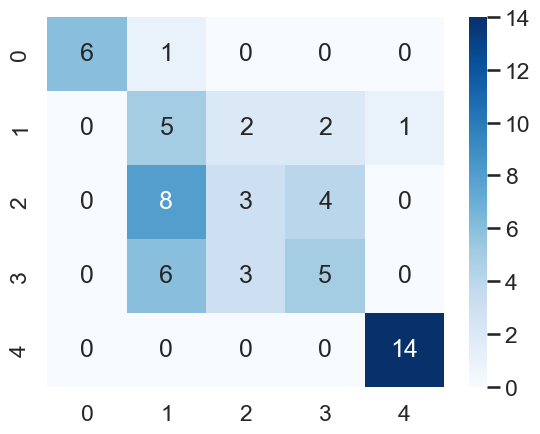

In [23]:
# Plotting the confusion matrix
cm = sklearn.metrics.confusion_matrix(test_y, voting_predict_y)
sns.heatmap(cm, annot=True, cmap='Blues')